# Figure 1 D
Heatmap of 22q DEL vs DUP

In [2]:
%matplotlib inline

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sbn
import nibabel as nib
import matplotlib as mpl
from scipy import io as sio
from matplotlib import pyplot as plt

In [4]:
# Set some parameters for the figures
#font = {'family' : 'Arial',
#        'size' : 12
##       }
#mpl.rc('font', **font)

In [5]:
# Paths
root_p = '/project/6008022/su_cm/paper_16p22q/'
dc22_p = os.path.join(root_p, 'glm/22q/cambridge64/del_minus_con/glm_del_minus_con_cambridge64.mat')
dp22_p = os.path.join(root_p, 'glm/22q/cambridge64/dup_minus_con/glm_dup_minus_con_cambridge64.mat')
dc16_p = os.path.join(root_p, 'glm/16p/cambridge64/del_minus_con/glm_del_minus_con_cambridge64.mat')
dp16_p = os.path.join(root_p, 'glm/16p/cambridge64/dup_minus_con/glm_dup_minus_con_cambridge64.mat')

labels_p = '/home/surchs/sim_big/ATLAS/MIST/Parcel_Information/MIST_64.csv'
hier_p = '/home/surchs/sim_big/ATLAS/MIST/Hierarchy/MIST_PARCEL_ORDER.csv'
temp_p = '/project/6003287/ATLAS/MIST/Parcellations/MIST_64.nii.gz'
figure_p = '/project/6008022/su_cm/paper_16p22q/figures/fig1/'

In [6]:
# Load the MIST64 template
temp_i = nib.load(temp_p)
mist64 = temp_i.get_data()
# Get the parcel info
label = pd.read_csv(labels_p, delimiter=';')
hier = pd.read_csv(hier_p)

In [7]:
# Get all the patterns and pd
dc22_pattern = np.array(sio.loadmat(dc22_p)['eff']).squeeze()
dp22_pattern = np.array(sio.loadmat(dp22_p)['eff']).squeeze()
dc22_pd = np.array(sio.loadmat(dc22_p)['perc_discovery']).squeeze()
dp22_pd = np.array(sio.loadmat(dp22_p)['perc_discovery']).squeeze()

In [18]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

/home/surchs/conda/envs/16p/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


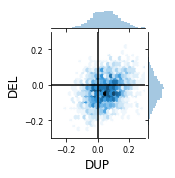

In [22]:
# Plot the heatmap for 22q
f_width = 60/25.4
g = sbn.jointplot(x=dp22_pattern, y=dc22_pattern, kind='hex', ylim=(-0.3, 0.3), xlim=(-0.3, 0.3), joint_kws={"extent": (-0.3, 0.3, -0.3, 0.3)},
                 stat_func=None, size=f_width)
#tmp = g.ax_joint.set(xlabel='$\Delta$ FC in 22q DUP', ylabel='$\Delta$ FC in 22p DEL')
tmp = g.ax_joint.set_xticklabels(g.ax_joint.get_xticklabels(), fontsize=8)
tmp = g.ax_joint.set_yticklabels(g.ax_joint.get_yticklabels(), fontsize=8)
tmp = g.ax_joint.set_xlabel('DUP', fontsize=12)
tmp = g.ax_joint.set_ylabel('DEL', fontsize=12)
g.ax_joint.plot([0, 0], [-0.3, 0.3], 'k')
g.ax_joint.plot([-0.3, 0.3], [0, 0], 'k')

g.savefig(os.path.join(figure_p, 'figure_1_D.pdf'), dpi=300, transparent=True)